# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

# Reading in Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_dictionary.xlsx to data_dictionary (2).xlsx
Saving scoring_format.csv to scoring_format (3).csv
Saving submission_format.csv to submission_format (2).csv
Saving training.csv to training (3).csv


In [ ]:
training = pd.read_csv(io.BytesIO(uploaded['training.csv']))
training

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_727,wellbore_chev_no_0,area_0,formation_62,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,wellbore_chev_no_0_728,wellbore_chev_no_0,area_0,formation_61,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,wellbore_chev_no_0_729,wellbore_chev_no_0,area_0,formation_59,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,wellbore_chev_no_0_730,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,wellbore_chev_no_0_731,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167
...,...,...,...,...,...,...,...,...,...,...,...
6833,wellbore_chev_no_9_827,wellbore_chev_no_9,area_0,formation_88,bit_model_4,12.25,24810.0,24839.5,69.847645,20.770119,157.329500
6834,wellbore_chev_no_9_828,wellbore_chev_no_9,area_0,formation_87,bit_model_4,12.25,24840.0,24869.5,65.763896,15.634577,145.228103
6835,wellbore_chev_no_9_829,wellbore_chev_no_9,area_0,formation_87,bit_model_4,12.25,24870.0,24899.5,66.727449,15.356773,149.525177
6836,wellbore_chev_no_9_830,wellbore_chev_no_9,area_0,formation_87,bit_model_4,12.25,24900.0,24929.5,66.639130,16.970275,149.496551


In [ ]:
data_dict = pd.read_excel(io.BytesIO(uploaded['data_dictionary.xlsx']))
data_dict

,Column,Name,Description
0,segment_id,Segment ID (Known in advance),A unique ID assigned to each roughly 30 ft sec...
1,wellbore_chev_no_id,Wellbore ID (Known in advance),The ID associated with each well.
2,area_id,Area ID (Known in advance),Geographic area identifier. Wells in the same ...
3,formation_id,Formation (Known in advance),This is the rock formation being drilled throu...
4,bit_model_id,Bit Model (Controllable),Bit model selected by drilling engineer.
5,drillbit_size,Bit size (Known in advance),this is the diameter of the bit. This is part ...
6,min_depth,Depth (Known in advance),The well plan defines the trajectory of the we...
7,max_depth,Depth (Known in advance),The well plan defines the trajectory of the we...
8,rate_of_penetration,Rate of Penetration (ROP) (Response variable),It’s a measure of the drilling speed. Units ar...
9,surface_weight_on_bit,Weight on Bit (WOB)(Controllable),This is the amount of force applied downward o...


In [ ]:
scoring_format = pd.read_csv(io.BytesIO(uploaded['scoring_format.csv']))
scoring_format

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_749,wellbore_chev_no_0,area_0,formation_233,bit_model_1,12.25,22470,22499.5,32.550518,150.505500
1,wellbore_chev_no_0_750,wellbore_chev_no_0,area_0,formation_233,bit_model_1,12.25,22500,22529.5,36.330343,150.467168
2,wellbore_chev_no_0_751,wellbore_chev_no_0,area_0,formation_233,bit_model_1,12.25,22530,22559.5,38.590450,150.573168
3,wellbore_chev_no_0_752,wellbore_chev_no_0,area_0,formation_233,bit_model_1,12.25,22560,22589.5,33.998955,150.190501
4,wellbore_chev_no_0_753,wellbore_chev_no_0,area_0,formation_233,bit_model_1,12.25,22590,22619.5,31.256037,149.944833
5,wellbore_chev_no_0_754,wellbore_chev_no_0,area_0,formation_233,bit_model_1,12.25,22620,22649.5,33.561337,149.983833
6,wellbore_chev_no_0_755,wellbore_chev_no_0,area_0,formation_233,bit_model_1,12.25,22650,22679.5,39.926450,150.004000
7,wellbore_chev_no_0_756,wellbore_chev_no_0,area_0,formation_71,bit_model_1,12.25,22680,22709.5,28.641355,149.966831
8,wellbore_chev_no_0_757,wellbore_chev_no_0,area_0,formation_69,bit_model_1,12.25,22710,22739.5,18.913420,150.497288
9,wellbore_chev_no_0_758,wellbore_chev_no_0,area_0,formation_68,bit_model_1,12.25,22740,22769.5,29.450819,150.484834


In [ ]:
submission_format = pd.read_csv(io.BytesIO(uploaded['submission_format.csv']))
submission_format

,segment_id,rate_of_penetration
0,wellbore_chev_no_14_665,0
1,wellbore_chev_no_14_681,0
2,wellbore_chev_no_14_682,0
3,wellbore_chev_no_14_683,0
4,wellbore_chev_no_14_684,0
...,...,...
1562,wellbore_chev_no_7_780,0
1563,wellbore_chev_no_7_781,0
1564,wellbore_chev_no_7_782,0
1565,wellbore_chev_no_7_783,0


In [ ]:
# MAKING (DEEP) COPIES OF DATAFRAMES

training_df = training.copy()
data_dict_df = data_dict.copy()
scoring_format_df = scoring_format.copy()
submission_format_df = submission_format.copy()

# Data Exploration

In [ ]:
# dimensions
training_df.shape

(6838, 11)

In [ ]:
training_df.isnull().values.any() #check for null values

False

In [ ]:
# response variable range of values
training_df['rate_of_penetration'].value_counts(bins=5)

(4.874, 106.857]      3714
(106.857, 208.332]    2806
(208.332, 309.806]     270
(309.806, 411.281]      26
(411.281, 512.755]      22
Name: rate_of_penetration, dtype: int64

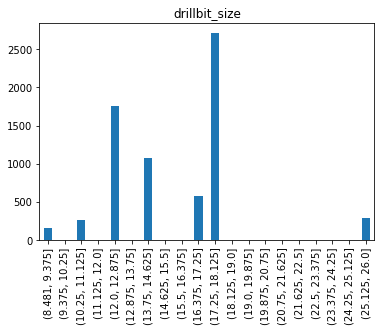

In [ ]:
# possible regressors (numeric) range of values
training_df['drillbit_size'].value_counts(sort=False, bins=20).plot(kind='bar', title='drillbit_size')

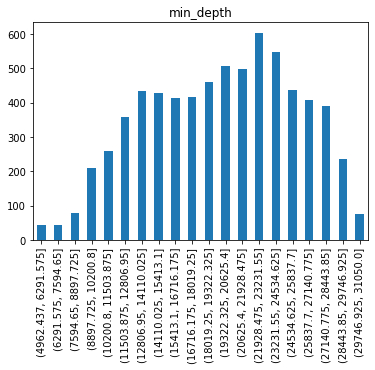

In [ ]:
# possible regressors (numeric) range of values
training_df['min_depth'].value_counts(sort=False, bins=20).plot(kind='bar', title='min_depth')

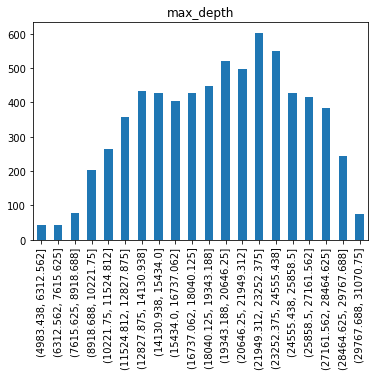

In [ ]:
# possible regressors (numeric) range of values
training_df['max_depth'].value_counts(sort=False, bins=20).plot(kind='bar', title='max_depth')

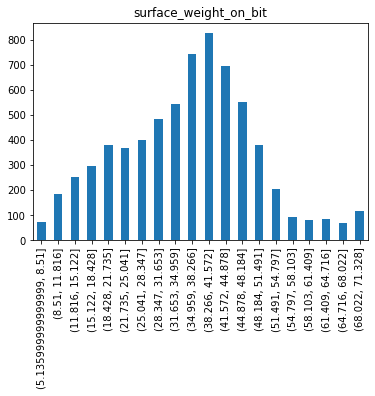

In [ ]:
# possible regressors (numeric) range of values
training_df['surface_weight_on_bit'].value_counts(sort=False, bins=20).plot(kind='bar', title='surface_weight_on_bit')

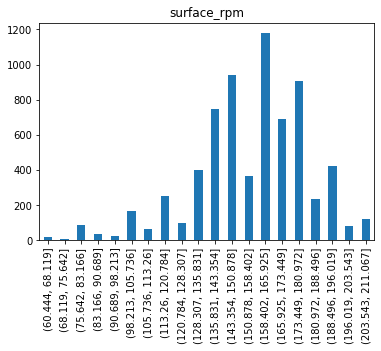

In [ ]:
# possible regressors (numeric) range of values
training_df['surface_rpm'].value_counts(sort=False, bins=20).plot(kind='bar', title='surface_rpm')

In [ ]:
def retrieve_final_num(df, col_name):
  """
  input: dataframe and col_name (string)
  within dataframe df, splits column col_name entries (strings) into lists
    by separator _, then calls the final element of the list (a string 
    containing a number) by index. transforms that string into an integer, then 
    returns a dataframe with the modified column.
  output: modified dataframe
  """
  df[col_name] = df[col_name].apply(lambda x: int((x.split("_", -1))[-1]))
  #source for .split(): https://www.w3schools.com/python/ref_string_split.asp
  return df

In [ ]:
#implement retrieve_final_num on categorical string variables in dataframe training_df
training_df = retrieve_final_num(training_df, 'wellbore_chev_no_id')
training_df = retrieve_final_num(training_df, 'area_id')
training_df = retrieve_final_num(training_df, 'formation_id')
training_df = retrieve_final_num(training_df, 'bit_model_id')

In [ ]:
training_df_nd = training_df.copy()
  #create copy of training_df with no dummy variables
training_df_nd
training_df = pd.get_dummies(data = training_df, columns = ['area_id', 'formation_id', 'bit_model_id'], drop_first = True)
  #separate categorical into dummy (one-hot encoded) variables.
training_df

,segment_id,wellbore_chev_no_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm,area_id_1,formation_id_1,formation_id_2,formation_id_3,formation_id_4,formation_id_5,formation_id_6,formation_id_7,formation_id_8,formation_id_9,formation_id_11,formation_id_12,formation_id_13,formation_id_14,formation_id_15,formation_id_16,formation_id_17,formation_id_18,formation_id_19,formation_id_20,formation_id_21,formation_id_22,formation_id_23,formation_id_25,formation_id_26,formation_id_27,formation_id_28,formation_id_29,formation_id_33,formation_id_35,formation_id_36,formation_id_38,...,formation_id_259,formation_id_260,formation_id_261,bit_model_id_1,bit_model_id_2,bit_model_id_3,bit_model_id_4,bit_model_id_6,bit_model_id_8,bit_model_id_10,bit_model_id_11,bit_model_id_12,bit_model_id_13,bit_model_id_14,bit_model_id_15,bit_model_id_16,bit_model_id_17,bit_model_id_18,bit_model_id_19,bit_model_id_20,bit_model_id_21,bit_model_id_22,bit_model_id_23,bit_model_id_24,bit_model_id_25,bit_model_id_26,bit_model_id_27,bit_model_id_28,bit_model_id_29,bit_model_id_30,bit_model_id_31,bit_model_id_32,bit_model_id_33,bit_model_id_34,bit_model_id_36,bit_model_id_37,bit_model_id_39,bit_model_id_40,bit_model_id_42,bit_model_id_43
0,wellbore_chev_no_0_727,0,12.25,21834.5,21839.5,99.614650,43.533280,150.369091,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,wellbore_chev_no_0_728,0,12.25,21840.0,21869.5,99.354021,42.382033,150.369001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,wellbore_chev_no_0_729,0,12.25,21870.0,21899.5,83.622907,48.675129,150.429335,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,wellbore_chev_no_0_730,0,12.25,21900.0,21929.5,85.427731,30.041290,150.080000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,wellbore_chev_no_0_731,0,12.25,21930.0,21959.5,100.639811,31.406319,150.032167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,wellbore_chev_no_9_827,9,12.25,24810.0,24839.5,69.847645,20.770119,157.329500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6834,wellbore_chev_no_9_828,9,12.25,24840.0,24869.5,65.763896,15.634577,145.228103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6835,wellbore_chev_no_9_829,9,12.25,24870.0,24899.5,66.727449,15.356773,149.525177,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6836,wellbore_chev_no_9_830,9,12.25,24900.0,24929.5,66.639130,16.970275,149.496551,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
training_df = training_df.reindex(sorted(training_df.columns), axis=1)

In [ ]:
type(training_df)

pandas.core.frame.DataFrame

#Continue Data Exploration (check for collinearity)

In [ ]:
import seaborn as sns

In [ ]:
# #run pairplot on possible regressors
# sns.pairplot(training_df_nd.drop(labels = ["rate_of_penetration", "min_depth"], axis = 1), hue = "wellbore_chev_no_id")
#              #palette = sns.color_palette("crest", n_colors = max(training_df_nd["wellbore_chev_no_id"])))

#Lasso Regression Models

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler

In [ ]:
X_lasso = training_df.drop(labels = ["rate_of_penetration", "segment_id", "min_depth"], axis = 1)
y_lasso = training_df["rate_of_penetration"]

#create testing dataset
X_train_full_lasso, X_test_lasso, y_train_full_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_train_lasso, X_val_lasso, y_train_lasso, y_val_lasso = train_test_split(X_train_full_lasso, y_train_full_lasso, test_size = 0.15, random_state = 0)

In [ ]:
print(X_train_lasso.shape)
print(X_test_lasso.shape)
print(X_val_lasso.shape)
print(y_train_lasso.shape)
print(y_test_lasso.shape)
print(y_val_lasso.shape)

(4940, 281)
(1026, 281)
(872, 281)
(4940,)
(1026,)
(872,)


In [ ]:
# Scaling for this regularised regression
sc = StandardScaler()

X_train_lasso = sc.fit_transform(X_train_lasso)
X_train_lasso = pd.DataFrame(data = X_train_lasso, columns = X_lasso.columns)

X_val_lasso = sc.fit_transform(X_val_lasso)
X_val_lasso = pd.DataFrame(data = X_val_lasso, columns = X_lasso.columns)

# Scaling (wihtout fitting!) test data
X_test_lasso = sc.transform(X_test_lasso)
X_test_lasso = pd.DataFrame(data = X_test_lasso, columns = X_lasso.columns)


In [ ]:
# fitting model to training data
# by default, alpha = 1
lasso_model = Lasso().fit(X_train_lasso,y_train_lasso)

In [ ]:
# running prediction on validation data, and calculating RMSE
y_val_pred_lasso = lasso_model.predict(X_val_lasso)
RMSE_val_lasso = np.sqrt((1/y_val_pred_lasso.size) * np.sum((y_val_pred_lasso - y_val_lasso)**2))
RMSE_val_lasso

29.686640814609095

#Random Forest Models


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = training_df.drop(labels = ["rate_of_penetration", "segment_id", "min_depth"], axis = 1) #drop columns (y, identifier, multicollinear with max_depth)
y = training_df["rate_of_penetration"]

In [ ]:
#create testing dataset
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size = 0.15, random_state = 0)

In [ ]:
#check resulting dimensions
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(4940, 281)
(1026, 281)
(872, 281)
(4940,)
(1026,)
(872,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#source documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [ ]:
regressors = RandomForestRegressor(n_estimators = 100, random_state = 0)
  #creates random forest regression model with 100 trees and random_state (similar to set_seed in R) for reproducibility
regressors.fit(X_train, y_train)
#train model on training data

RandomForestRegressor(random_state=0)

In [ ]:
ytrain_pred = regressors.predict(X_train)
#find predicted y-values based on X training data

In [ ]:
yval_pred = regressors.predict(X_val)
#find predicted y-values based on X validation data

In [ ]:
RMSE_train = np.sqrt((1/ytrain_pred.size) * np.sum((ytrain_pred - y_train)**2))
#calculate RMSE for training data
RMSE_train

6.8032414856120775

In [ ]:
RMSE_val = np.sqrt((1/yval_pred.size) * np.sum((yval_pred - y_val)**2))
#calculate RMSE for validation data
RMSE_val

15.908135437819533

# Create model plot (before hyperparameter tuning)

In [ ]:
X_ndp = training_df_nd.drop(labels = ["rate_of_penetration", "segment_id", "min_depth"], axis = 1) #drop columns (y, identifier, multicollinear with max_depth)
y_ndp = training_df_nd["rate_of_penetration"]

In [ ]:
#create testing dataset
X_ndp_train_full, X_ndp_test, y_ndp_train_full, y_ndp_test = train_test_split(X_ndp, y_ndp, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_ndp_train, X_ndp_val, y_ndp_train, y_ndp_val = train_test_split(X_ndp_train_full, y_ndp_train_full, test_size = 0.15, random_state = 0)

In [ ]:
yval_ndp_plot = pd.DataFrame(y_ndp_val.copy())
yval_ndp_pred_plot = pd.DataFrame({"rate_of_penetration": yval_pred.copy()})

In [ ]:
yval_plot['predicted'] = [0 for item in y_ndp_val]
yval_plot
yval_pred_plot['predicted'] = [1 for item in y_val]
yval_pred_plot

,rate_of_penetration,predicted
0,82.617591,1
1,88.491960,1
2,96.395850,1
3,105.699244,1
4,139.262020,1
...,...,...
867,81.002544,1
868,118.468102,1
869,133.765063,1
870,150.969170,1


In [ ]:
yval_vertical = pd.concat([yval_plot, yval_pred_plot], ignore_index=True)
Xval_vertical = pd.concat([X_ndp_val, X_ndp_val], ignore_index = True)

In [ ]:
plot_ready = pd.concat([yval_vertical, Xval_vertical], axis=1)

In [ ]:
# #run pairplot to visualize model
# visualize_pretuning = sns.pairplot(data = plot_ready, y_vars = "rate_of_penetration", 
#                                    x_vars = ["wellbore_chev_no_id",	"area_id", "formation_id", "bit_model_id", 
#                                               "drillbit_size", "max_depth", "surface_weight_on_bit", "surface_rpm"], 
#                                    hue = "predicted", 
#                                    plot_kws={"s": 7, 'alpha': 0.4})
# #plt.suptitle('Performance of Random Forest Model 1 predicting Rate of Penetration', 
#             # size = 13)
# #fig = visualize_pretuning.fig
# #fig("visualize_pretuning.png")
# visualize_pretuning.savefig('visualize_pretuning.png')

Random forest regression (removing 'surface_rpm' to address collinearity)

In [ ]:
X_nc = training_df.drop(labels = ["rate_of_penetration", "segment_id", "min_depth", "surface_rpm"], axis = 1) #drop columns (y, identifier, multicollinear with max_depth)
y_nc = training_df["rate_of_penetration"]

In [ ]:
#create testing dataset
X_nc_train_full, X_nc_test, y_nc_train_full, y_nc_test = train_test_split(X_nc, y_nc, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_nc_train, X_nc_val, y_nc_train, y_nc_val = train_test_split(X_nc_train_full, y_nc_train_full, test_size = 0.15, random_state = 0)

In [ ]:
#check resulting dimensions
print(X_nc_train.shape)
print(X_nc_test.shape)
print(X_nc_val.shape)
print(y_nc_train.shape)
print(y_nc_test.shape)
print(y_nc_val.shape)

(4940, 280)
(1026, 280)
(872, 280)
(4940,)
(1026,)
(872,)


In [ ]:
regressors_nc = RandomForestRegressor(n_estimators = 100, random_state = 0)
  #creates random forest regression model with 100 trees and random_state (similar to set_seed in R) for reproducibility
regressors_nc.fit(X_nc_train, y_nc_train)
#train model on training data

RandomForestRegressor(random_state=0)

In [ ]:
ytrain_nc_pred = regressors_nc.predict(X_nc_train)
#find predicted y-values based on X training data

In [ ]:
yval_nc_pred = regressors_nc.predict(X_nc_val)
#find predicted y-values based on X validation data

In [ ]:
RMSE_nc_train = np.sqrt((1/ytrain_nc_pred.size) * np.sum((ytrain_nc_pred - y_nc_train)**2))
#calculate RMSE for training data
RMSE_nc_train

6.683284825245926

In [ ]:
RMSE_nc_val = np.sqrt((1/yval_nc_pred.size) * np.sum((yval_nc_pred - y_nc_val)**2))
#calculate RMSE for validation data
RMSE_nc_val

16.64761871019002

Implement Random Forest Regression with no categorical variables ("For data including categorical variables with different number of levels, random forests are biased in favor of those attributes with more levels." - https://en.wikipedia.org/wiki/Random_forest). Exploring: what about with none?

In [ ]:
X_2 = training_df[["drillbit_size", "max_depth", "surface_weight_on_bit", "surface_rpm"]] #select only numeric variables
y_2 = training_df["rate_of_penetration"]

In [ ]:
#create testing dataset
X_train_full_2, X_test_2, y_train_full_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_train_2, X_val_2, y_train_2, y_val_2 = train_test_split(X_train_full_2, y_train_full_2, test_size = 0.15, random_state = 0)

In [ ]:
print(X_train_2.shape)
print(X_test_2.shape)
print(X_val_2.shape)
print(y_train_2.shape)
print(y_test_2.shape)
print(y_val_2.shape)

(4940, 4)
(1026, 4)
(872, 4)
(4940,)
(1026,)
(872,)


In [ ]:
regressors_2 = RandomForestRegressor(n_estimators = 100, random_state = 0)
  #creates random forest regression model with 100 trees and random_state (similar to set_seed in R) for reproducibility
regressors_2.fit(X_train_2, y_train_2)
#train model on training data

RandomForestRegressor(random_state=0)

In [ ]:
ytrain_pred_2 = regressors_2.predict(X_train_2)
#find predicted y-values based on X-value training data

In [ ]:
yval_pred_2 = regressors_2.predict(X_val_2)
#find predicted y-values based on X-value validation data

In [ ]:
RMSE_train_2 = np.sqrt((1/ytrain_pred_2.size) * np.sum((ytrain_pred_2 - y_train_2)**2))
#calculate RMSE for training data
RMSE_train_2

8.336804666691478

In [ ]:
RMSE_val_2 = np.sqrt((1/yval_pred_2.size) * np.sum((yval_pred_2 - y_val)**2))
#calculate RMSE for validation data
RMSE_val_2

19.507294387311113

In [ ]:
standard_deviation = np.std(y_train_full_2)
#check RMSE/standard deviation value
RMSE_val_2/standard_deviation

0.35204010407400105

Next attempt: Random Forest Regression without the categorical regressor with the most levels (formation_id, with 261).

In [ ]:
X_3 = training_df.drop(labels = training_df.columns.values.tolist()[8:246] + ["rate_of_penetration", "segment_id", "min_depth"], axis = 1)
#create training data without 'formation_id' and others (NOTE: because of manual indexing, needs to be adjusted with ANY CHANGE to the original training_df)
y_3 = training_df["rate_of_penetration"]
#pull y_values

In [ ]:
#create testing dataset
X_train_full_3, X_test_3, y_train_full_3, y_test_3 = train_test_split(X_3, y_3, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_train_3, X_val_3, y_train_3, y_val_3 = train_test_split(X_train_full_3, y_train_full_3, test_size = 0.15, random_state = 0)

In [ ]:
#check dimensions
print(X_train_3.shape)
print(X_test_3.shape)
print(X_val_3.shape)
print(y_train_3.shape)
print(y_test_3.shape)
print(y_val_3.shape)

(4940, 43)
(1026, 43)
(872, 43)
(4940,)
(1026,)
(872,)


In [ ]:
regressors_3 = RandomForestRegressor(n_estimators = 100, random_state = 0)   #creates random forest regression model with 100 trees and random_state (similar to set_seed in R) for reproducibility
regressors_3.fit(X_train_3, y_train_3)
#train model on training data

RandomForestRegressor(random_state=0)

In [ ]:
ytrain_pred_3 = regressors_3.predict(X_train_3) #find predicted y-values based on X-value training data

In [ ]:
yval_pred_3 = regressors_3.predict(X_val_3) #find predicted y-values based on X-value validation data

In [ ]:
RMSE_train_3 = np.sqrt((1/ytrain_pred_3.size) * np.sum((ytrain_pred_3 - y_train_3)**2))
#calculate RMSE for training data
RMSE_train_3

7.105167310479614

In [ ]:
RMSE_val_3 = np.sqrt((1/yval_pred_3.size) * np.sum((yval_pred_3 - y_val_3)**2))
#calculate RMSE for validation data
RMSE_val_3

15.806359606387694

# Forward Stepwise Variable Selection

In [ ]:
X_fs = training_df.drop(labels = ["segment_id"], axis = 1) #select new X and y values
y_fs = training_df["rate_of_penetration"]

In [ ]:
#create testing dataset
X_train_full_fs, X_test_fs, y_train_full_fs, y_test_fs = train_test_split(X_fs, y_fs, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_train_fs, X_val_fs, y_train_fs, y_val_fs = train_test_split(X_train_full_fs, y_train_full_fs, test_size = 0.15, random_state = 0)

In [ ]:
#check dimensions
print(X_train_fs.shape)
print(X_test_fs.shape)
print(X_val_fs.shape)
print(y_train_fs.shape)
print(y_test_fs.shape)
print(y_val_fs.shape)

(4940, 283)
(1026, 283)
(872, 283)
(4940,)
(1026,)
(872,)


In [ ]:
X_train_full_fs.head()
#for xreg in list(X_train_full_fs.columns):
#  print(xreg)

,area_id_1,bit_model_id_1,bit_model_id_10,bit_model_id_11,bit_model_id_12,bit_model_id_13,bit_model_id_14,bit_model_id_15,bit_model_id_16,bit_model_id_17,bit_model_id_18,bit_model_id_19,bit_model_id_2,bit_model_id_20,bit_model_id_21,bit_model_id_22,bit_model_id_23,bit_model_id_24,bit_model_id_25,bit_model_id_26,bit_model_id_27,bit_model_id_28,bit_model_id_29,bit_model_id_3,bit_model_id_30,bit_model_id_31,bit_model_id_32,bit_model_id_33,bit_model_id_34,bit_model_id_36,bit_model_id_37,bit_model_id_39,bit_model_id_4,bit_model_id_40,bit_model_id_42,bit_model_id_43,bit_model_id_6,bit_model_id_8,drillbit_size,formation_id_1,...,formation_id_67,formation_id_68,formation_id_69,formation_id_7,formation_id_70,formation_id_71,formation_id_72,formation_id_73,formation_id_74,formation_id_75,formation_id_76,formation_id_77,formation_id_78,formation_id_79,formation_id_8,formation_id_80,formation_id_81,formation_id_82,formation_id_83,formation_id_85,formation_id_87,formation_id_88,formation_id_89,formation_id_9,formation_id_90,formation_id_91,formation_id_92,formation_id_93,formation_id_94,formation_id_95,formation_id_96,formation_id_97,formation_id_98,formation_id_99,max_depth,min_depth,rate_of_penetration,surface_rpm,surface_weight_on_bit,wellbore_chev_no_id
5936,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,18.125,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14729.50,14700.0,135.930097,182.344288,46.658692,8
6292,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12.250,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25409.50,25380.0,111.792943,171.710369,39.508606,8
861,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.500,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13109.50,13080.0,249.613073,200.533333,40.531619,15
4904,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,14.500,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23939.50,23910.0,47.776784,160.743168,28.788623,5
3524,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18.125,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23459.75,23430.0,105.065250,148.250000,30.325083,24


# Import and adjust scoring (make sure input parameters match)

In [471]:
from google.colab import files
uploaded = files.upload()

Saving scoring.csv to scoring (4).csv


In [472]:
scoring = pd.read_csv(io.BytesIO(uploaded['scoring.csv']))
scoring2 = scoring.copy()
scoring

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_14_665,wellbore_chev_no_14,area_1,formation_220,bit_model_10,18.125,19950.0,19950.0,21.660570,60.655739
1,wellbore_chev_no_14_681,wellbore_chev_no_14,area_1,formation_215,bit_model_10,18.125,20452.0,20459.5,27.768233,160.737708
2,wellbore_chev_no_14_682,wellbore_chev_no_14,area_1,formation_215,bit_model_10,18.125,20460.0,20489.5,28.667844,159.185793
3,wellbore_chev_no_14_683,wellbore_chev_no_14,area_1,formation_213,bit_model_10,18.125,20490.0,20519.5,24.379720,160.027321
4,wellbore_chev_no_14_684,wellbore_chev_no_14,area_1,formation_213,bit_model_10,18.125,20520.0,20549.5,23.551256,151.726782
...,...,...,...,...,...,...,...,...,...,...
1562,wellbore_chev_no_7_780,wellbore_chev_no_7,area_1,formation_141,bit_model_41,18.125,23400.0,23429.0,16.053570,150.395028
1563,wellbore_chev_no_7_781,wellbore_chev_no_7,area_1,formation_142,bit_model_41,18.125,23430.0,23457.5,10.969312,150.424116
1564,wellbore_chev_no_7_782,wellbore_chev_no_7,area_1,formation_142,bit_model_41,18.125,23463.5,23489.5,10.123237,150.427304
1565,wellbore_chev_no_7_783,wellbore_chev_no_7,area_1,formation_142,bit_model_41,18.125,23490.0,23519.5,11.809528,147.973016


In [473]:
#implement retrieve_final_num on categorical string variables in dataframe training_df
scoring = retrieve_final_num(scoring, 'wellbore_chev_no_id')
scoring = retrieve_final_num(scoring, 'area_id')
scoring = retrieve_final_num(scoring, 'formation_id')
scoring = retrieve_final_num(scoring, 'bit_model_id')

In [474]:
scoring_nd = scoring.copy()
  #create copy of training_df with no dummy variables
scoring_nd
scoring = pd.get_dummies(data = scoring, columns = ['area_id', 'formation_id', 'bit_model_id'], drop_first = True) #CHECK WHETHER THIS ELIMINATES ANY VARS
  #separate categorical into dummy (one-hot encoded) variables.
scoring

,segment_id,wellbore_chev_no_id,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm,area_id_1,formation_id_9,formation_id_10,formation_id_15,formation_id_16,formation_id_17,formation_id_18,formation_id_19,formation_id_20,formation_id_21,formation_id_29,formation_id_32,formation_id_33,formation_id_37,formation_id_43,formation_id_44,formation_id_45,formation_id_46,formation_id_47,formation_id_52,formation_id_53,formation_id_58,formation_id_59,formation_id_61,formation_id_62,formation_id_63,formation_id_64,formation_id_65,formation_id_66,formation_id_67,formation_id_68,formation_id_69,formation_id_70,...,formation_id_177,formation_id_178,formation_id_179,formation_id_180,formation_id_182,formation_id_185,formation_id_186,formation_id_193,formation_id_194,formation_id_195,formation_id_199,formation_id_200,formation_id_201,formation_id_211,formation_id_212,formation_id_213,formation_id_214,formation_id_215,formation_id_216,formation_id_217,formation_id_218,formation_id_220,formation_id_221,formation_id_225,formation_id_231,formation_id_232,formation_id_233,formation_id_235,formation_id_236,formation_id_237,bit_model_id_7,bit_model_id_9,bit_model_id_10,bit_model_id_26,bit_model_id_29,bit_model_id_31,bit_model_id_32,bit_model_id_33,bit_model_id_38,bit_model_id_41
0,wellbore_chev_no_14_665,14,18.125,19950.0,19950.0,21.660570,60.655739,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,wellbore_chev_no_14_681,14,18.125,20452.0,20459.5,27.768233,160.737708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,wellbore_chev_no_14_682,14,18.125,20460.0,20489.5,28.667844,159.185793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,wellbore_chev_no_14_683,14,18.125,20490.0,20519.5,24.379720,160.027321,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,wellbore_chev_no_14_684,14,18.125,20520.0,20549.5,23.551256,151.726782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,wellbore_chev_no_7_780,7,18.125,23400.0,23429.0,16.053570,150.395028,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1563,wellbore_chev_no_7_781,7,18.125,23430.0,23457.5,10.969312,150.424116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1564,wellbore_chev_no_7_782,7,18.125,23463.5,23489.5,10.123237,150.427304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1565,wellbore_chev_no_7_783,7,18.125,23490.0,23519.5,11.809528,147.973016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [475]:
X_scoring = scoring.drop(labels = ["segment_id", "min_depth", "wellbore_chev_no_id"], axis = 1) #CHANGE BASED ON DROPPING

In [476]:
training_df.shape
col_names_X_scoring = list(X_scoring.columns)
col_names_X_train = list(X_train.columns) #MUST CHANGE WITH FINAL MODEL
col_names_added = []
for item in col_names_X_scoring:
  if item not in col_names_X_train:
    col_names_added.append(item)

for item in col_names_added:
  X_train[item] = 0
  X_val[item] = 0
  X_test[item] = 0

X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_val = X_val.reindex(sorted(X_val.columns), axis=1)
X_test = X_test.reindex(sorted(X_test.columns), axis=1)

#X_scoring = X_scoring.drop(["wellbore_chev_no_id"], axis = 1)
#X_scoring2.shape

# Hyperparameter Tuning- Random Forest Regression Model

We're now working with our most succesful Random Forest Regression Model, after having experimented with different variables selections

In [477]:
X_new = training_df.drop(labels = ["rate_of_penetration", "segment_id", "min_depth", "wellbore_chev_no_id"], axis = 1) #drop columns (y, identifier, multicollinear with max_depth)
y_new = training_df["rate_of_penetration"]

In [478]:
#create testing dataset
X_train_full_new, X_test_new, y_train_full_new, y_test_new = train_test_split(X_new, y_new, test_size = 0.15, random_state = 0)
#create training and validation datasets
X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_train_full_new, y_train_full_new, test_size = 0.15, random_state = 0)

In [479]:
#check resulting dimensions
print(X_train_new.shape)
print(X_test_new.shape)
print(X_val_new.shape)
print(y_train_new.shape)
print(y_test_new.shape)
print(y_val_new.shape)

(4940, 280)
(1026, 280)
(872, 280)
(4940,)
(1026,)
(872,)


In [480]:
regressors_new = RandomForestRegressor(random_state = 0)
#creates random forest regression model with default parameters and a set random_state (similar to set_seed in R) for reproducibility
regressors_new.fit(X_train_new, y_train_new)
#train model on training data

RandomForestRegressor(random_state=0)

In [481]:
ytrain_pred_new = regressors_new.predict(X_train_new)
#find predicted y-values based on X training data

In [482]:
yval_pred_new = regressors_new.predict(X_val_new)
#find predicted y-values based on X validation data

In [483]:
RMSE_train_new = np.sqrt((1/ytrain_pred_new.size) * np.sum((ytrain_pred_new - y_train_new)**2))
#calculate RMSE for training data
RMSE_train_new

6.943860686122936

In [484]:
RMSE_val_new = np.sqrt((1/yval_pred_new.size) * np.sum((yval_pred_new - y_val_new)**2))
#calculate RMSE for validation data
RMSE_val_new

16.19227089448906

In [485]:
print('Current Parameters being used')
regressors_new.get_params()

Current Parameters being used


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [486]:
from sklearn.model_selection import GridSearchCV

# Number of trees
n_estimators = [100, 200, 300, 400]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create a grid of these parameters
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

random_forest = GridSearchCV(estimator = regressors_new, 
                                   param_grid = param_grid,
                                   cv = 2) 

# fit to training data
random_forest.fit(X_train_new, y_train_new)



GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300, 400]})

In [487]:
ytrain_pred_forest = random_forest.predict(X_train_new)
#find predicted y-values based on X training data

In [488]:
yval_pred_forest = random_forest.predict(X_val_new)
#find predicted y-values based on X validation data

In [489]:
RMSE_train_forest = np.sqrt((1/ytrain_pred_forest.size) * np.sum((ytrain_pred_forest - y_train_new)**2))
#calculate RMSE for training data
RMSE_train_forest

6.672477037242645

In [490]:
RMSE_val_forest = np.sqrt((1/yval_pred_forest.size) * np.sum((yval_pred_forest - y_val_new)**2))
#calculate RMSE for validation data
RMSE_val_forest

15.367038461986642

In [491]:
print('Current Parameters being used')
random_forest.get_params()

Current Parameters being used


{'cv': 2,
 'error_score': nan,
 'estimator': RandomForestRegressor(random_state=0),
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__criterion': 'squared_error',
 'estimator__max_depth': None,
 'estimator__max_features': 'auto',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'n_jobs': None,
 'param_grid': {'max_features': ['auto', 'sqrt'],
  'n_estimators': [100, 200, 300, 400]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

# FINAL TEST OF RSME !!!!!

In [492]:
y_test_results = random_forest.predict(X_test_new)
#find predicted y-values based on X validation data

In [493]:
RMSE_test = np.sqrt((1/y_test_results.size) * np.sum((y_test_results - y_test_new)**2))
#calculate RMSE for training data
RMSE_test

15.992729981134751

#FINAL CHECK AND EXPORT

In [494]:
final_model = random_forest

In [508]:
scoring = pd.read_csv(io.BytesIO(uploaded['scoring.csv']))
scoring2 = scoring.copy()
scoring

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_14_665,wellbore_chev_no_14,area_1,formation_220,bit_model_10,18.125,19950.0,19950.0,21.660570,60.655739
1,wellbore_chev_no_14_681,wellbore_chev_no_14,area_1,formation_215,bit_model_10,18.125,20452.0,20459.5,27.768233,160.737708
2,wellbore_chev_no_14_682,wellbore_chev_no_14,area_1,formation_215,bit_model_10,18.125,20460.0,20489.5,28.667844,159.185793
3,wellbore_chev_no_14_683,wellbore_chev_no_14,area_1,formation_213,bit_model_10,18.125,20490.0,20519.5,24.379720,160.027321
4,wellbore_chev_no_14_684,wellbore_chev_no_14,area_1,formation_213,bit_model_10,18.125,20520.0,20549.5,23.551256,151.726782
...,...,...,...,...,...,...,...,...,...,...
1562,wellbore_chev_no_7_780,wellbore_chev_no_7,area_1,formation_141,bit_model_41,18.125,23400.0,23429.0,16.053570,150.395028
1563,wellbore_chev_no_7_781,wellbore_chev_no_7,area_1,formation_142,bit_model_41,18.125,23430.0,23457.5,10.969312,150.424116
1564,wellbore_chev_no_7_782,wellbore_chev_no_7,area_1,formation_142,bit_model_41,18.125,23463.5,23489.5,10.123237,150.427304
1565,wellbore_chev_no_7_783,wellbore_chev_no_7,area_1,formation_142,bit_model_41,18.125,23490.0,23519.5,11.809528,147.973016


In [509]:
#implement retrieve_final_num on categorical string variables in dataframe training_df
scoring = retrieve_final_num(scoring, 'wellbore_chev_no_id')
scoring = retrieve_final_num(scoring, 'area_id')
scoring = retrieve_final_num(scoring, 'formation_id')
scoring = retrieve_final_num(scoring, 'bit_model_id')

In [510]:
scoring_nd = scoring.copy()
  #create copy of training_df with no dummy variables
scoring_nd
scoring = pd.get_dummies(data = scoring, columns = ['area_id', 'formation_id', 'bit_model_id'], drop_first = True) #CHECK WHETHER THIS ELIMINATES ANY VARS
  #separate categorical into dummy (one-hot encoded) variables.
scoring

,segment_id,wellbore_chev_no_id,drillbit_size,min_depth,max_depth,surface_weight_on_bit,surface_rpm,area_id_1,formation_id_9,formation_id_10,formation_id_15,formation_id_16,formation_id_17,formation_id_18,formation_id_19,formation_id_20,formation_id_21,formation_id_29,formation_id_32,formation_id_33,formation_id_37,formation_id_43,formation_id_44,formation_id_45,formation_id_46,formation_id_47,formation_id_52,formation_id_53,formation_id_58,formation_id_59,formation_id_61,formation_id_62,formation_id_63,formation_id_64,formation_id_65,formation_id_66,formation_id_67,formation_id_68,formation_id_69,formation_id_70,...,formation_id_177,formation_id_178,formation_id_179,formation_id_180,formation_id_182,formation_id_185,formation_id_186,formation_id_193,formation_id_194,formation_id_195,formation_id_199,formation_id_200,formation_id_201,formation_id_211,formation_id_212,formation_id_213,formation_id_214,formation_id_215,formation_id_216,formation_id_217,formation_id_218,formation_id_220,formation_id_221,formation_id_225,formation_id_231,formation_id_232,formation_id_233,formation_id_235,formation_id_236,formation_id_237,bit_model_id_7,bit_model_id_9,bit_model_id_10,bit_model_id_26,bit_model_id_29,bit_model_id_31,bit_model_id_32,bit_model_id_33,bit_model_id_38,bit_model_id_41
0,wellbore_chev_no_14_665,14,18.125,19950.0,19950.0,21.660570,60.655739,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,wellbore_chev_no_14_681,14,18.125,20452.0,20459.5,27.768233,160.737708,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,wellbore_chev_no_14_682,14,18.125,20460.0,20489.5,28.667844,159.185793,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,wellbore_chev_no_14_683,14,18.125,20490.0,20519.5,24.379720,160.027321,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,wellbore_chev_no_14_684,14,18.125,20520.0,20549.5,23.551256,151.726782,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,wellbore_chev_no_7_780,7,18.125,23400.0,23429.0,16.053570,150.395028,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1563,wellbore_chev_no_7_781,7,18.125,23430.0,23457.5,10.969312,150.424116,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1564,wellbore_chev_no_7_782,7,18.125,23463.5,23489.5,10.123237,150.427304,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1565,wellbore_chev_no_7_783,7,18.125,23490.0,23519.5,11.809528,147.973016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [511]:
X_scoring = scoring.drop(labels = ["segment_id", "min_depth", "wellbore_chev_no_id"], axis = 1) #CHANGE BASED ON DROPPING

In [512]:
training_df.shape
col_names_X_scoring = list(X_scoring.columns)
col_names_X_train = list(X_train.columns) #MUST CHANGE WITH FINAL MODEL
col_names_added = []
for item in col_names_X_train:
  if item not in col_names_X_scoring:
    col_names_added.append(item)

for item in col_names_added:
  X_scoring[item] = 0

X_scoring = X_scoring.reindex(sorted(X_scoring.columns), axis=1)

X_scoring = X_scoring.drop(["wellbore_chev_no_id"], axis = 1)
#X_scoring2.shape

In [513]:
X_scoring = X_scoring.drop(["bit_model_id_38", "bit_model_id_41", "bit_model_id_9", "formation_id_10", "bit_model_id_7", "formation_id_236", "formation_id_237", "formation_id_32", "formation_id_37"], axis = 1)

In [514]:
X_scoring
submission_data = final_model.predict(X_scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [515]:
final_submission = pd.DataFrame({"segment_id": scoring["segment_id"], "rate_of_penetration": submission_data})

In [516]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [517]:
final_submission.to_csv('submission.csv', index = False)
!cp submission.csv "drive/My Drive/"